<a href="https://colab.research.google.com/github/revs1/Simple_ML_notebooks-revs96/blob/master/CIFAR10_CNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import required libs
import keras
import numpy as np
from keras import backend as K
from keras.datasets import cifar10
from keras.models import Sequential
from keras import regularizers, optimizers
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization

import cnn_utils as utils

import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

plt.rcParams.update(params)
np.random.seed(42)

%matplotlib inline

In [0]:
BATCH_SIZE = 128
NUM_CLASSES = 10
EPOCHS = 25
INPUT_SHAPE = (32, 32, 3)
WEIGHT_DECAY = 1e-4
KFOLD_WEIGHT_PATH=r'../model/cnn_cifar10_weights_{epoch:02d}_{val_acc:.2f}.hdf5'

In [0]:
label_dict = {0:'airplane',
             1:'automobile',
             2:'bird',
             3:'cat',
             4:'deer',
             5:'dog',
             6:'frog',
             7:'horse',
             8:'ship',
             9:'truck'}

# for evaluation
TOP_N = 1

In [7]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 5s 0us/step


In [0]:
x_train = x_train/255.
x_test = x_test/255.

In [9]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

In [0]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=INPUT_SHAPE))

model.add(Conv2D(32, (3,3), padding='same', 
                kernel_regularizer=regularizers.l2(WEIGHT_DECAY),
                activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))

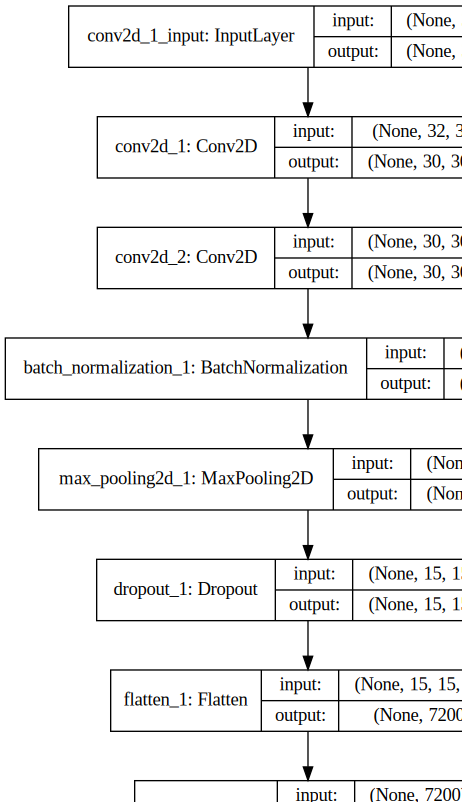

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, 
                 show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [0]:

early_stop_callback = [EarlyStopping(monitor='val_loss', 
                                     patience=3, verbose=0),
                       ModelCheckpoint(KFOLD_WEIGHT_PATH, 
                                       monitor='val_loss', 
                                       save_best_only=True, 
                                       verbose=0),
                      ]

In [18]:
history = model.fit(x_train, y_train,
                    validation_split=0.1,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=1,
                    )

Train on 45000 samples, validate on 5000 samples
Epoch 1/25
45000/45000 [==============================] - 93s 2ms/step - loss: 1.0876 - accuracy: 0.6178 - val_loss: 0.9911 - val_accuracy: 0.6506
Epoch 2/25
45000/45000 [==============================] - 93s 2ms/step - loss: 0.9811 - accuracy: 0.6558 - val_loss: 1.1860 - val_accuracy: 0.6114
Epoch 3/25
45000/45000 [==============================] - 94s 2ms/step - loss: 0.8989 - accuracy: 0.6844 - val_loss: 1.0797 - val_accuracy: 0.6160
Epoch 4/25
45000/45000 [==============================] - 94s 2ms/step - loss: 0.8389 - accuracy: 0.7072 - val_loss: 1.0324 - val_accuracy: 0.6636
Epoch 5/25
45000/45000 [==============================] - 93s 2ms/step - loss: 0.7807 - accuracy: 0.7267 - val_loss: 1.0774 - val_accuracy: 0.6812
Epoch 6/25
45000/45000 [==============================] - 93s 2ms/step - loss: 0.7438 - accuracy: 0.7416 - val_loss: 0.8932 - val_accuracy: 0.6920
Epoch 7/25
45000/45000 [==============================] - 93s 2ms/ste

In [19]:
score = model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 6s 623us/step


In [20]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.5591291591644287
Test accuracy: 0.6959999799728394


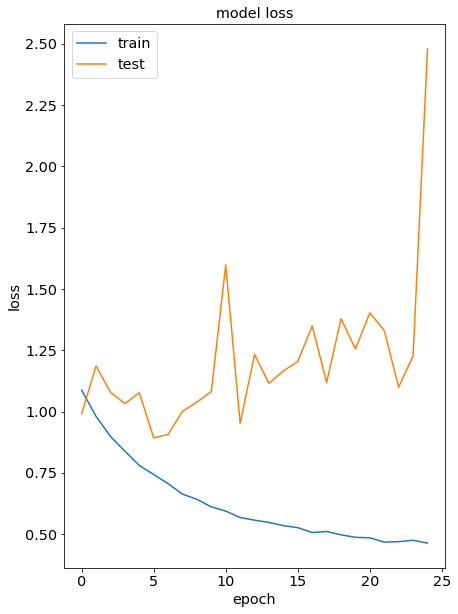

In [22]:
plt.figure(1,figsize=(15,10))  



# summarize history for loss  

plt.subplot(122)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

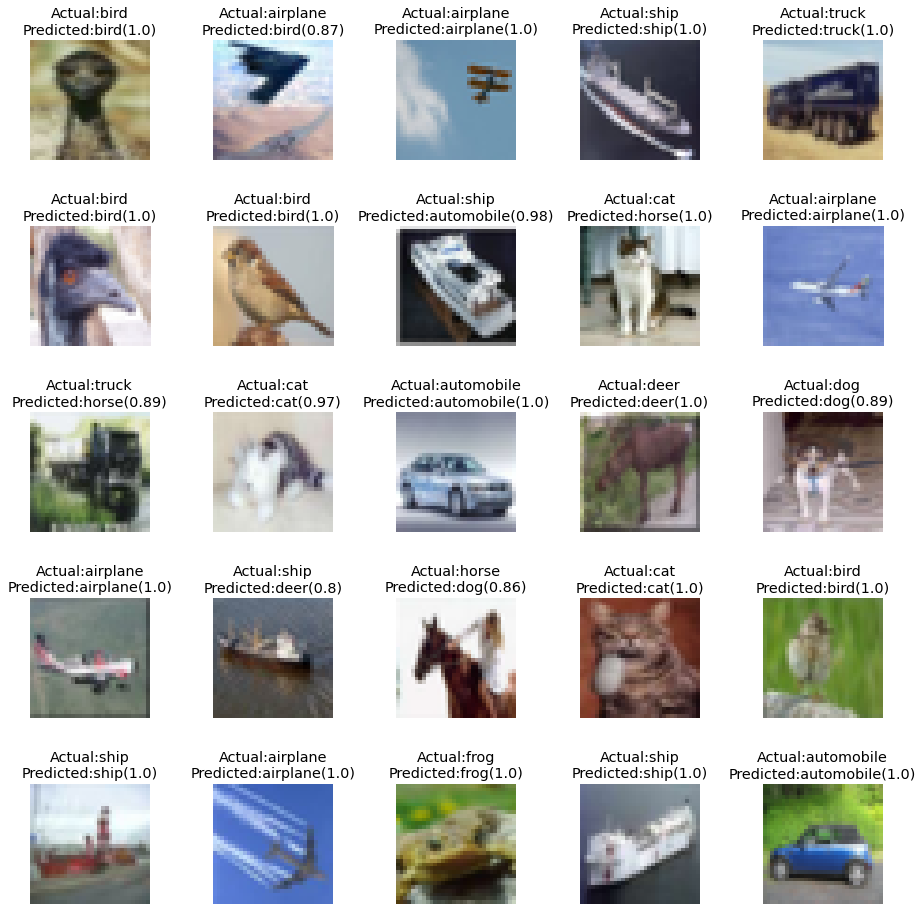

In [23]:
utils.plot_predictions(model=model,dataset=x_test,
                       dataset_labels=y_test,
                       label_dict=label_dict,
                       batch_size=25,
                       grid_height=5,
                       grid_width=5)